In [1]:
# import the libraries

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# read csv data 

churnData = pd.read_csv("Customer-Churn.csv")
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [4]:
# check data types

churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
# convert total charge column to an integer

churnData["TotalCharges"] = pd.to_numeric(churnData["TotalCharges"], errors = "coerce")


In [9]:
# check for nulls

churnData.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# replace nulls in total charge column with mean value of this column

churnData["TotalCharges"] = churnData["TotalCharges"].fillna(churnData["TotalCharges"].mean())

In [13]:
churnData["TotalCharges"].isnull().sum()

0

In [14]:
X = churnData[["tenure","SeniorCitizen", "MonthlyCharges", "TotalCharges"]]
y = churnData["Churn"]

In [15]:
# train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# scale data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [17]:
# fit model and check score

model = LogisticRegression(random_state=42)

model.fit(X_train,y_train)

model.score(X_test, y_test)

0.8076650106458482

<AxesSubplot:>

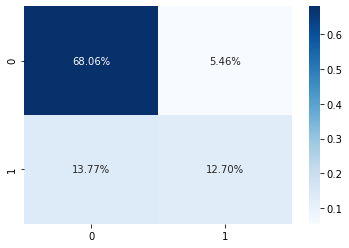

In [19]:
import seaborn as sns

predictions = model.predict(X_test)

confusion_matrix(y_test, predictions)

cf_matrix = confusion_matrix(y_test, predictions, normalize='all')


sns.heatmap(cf_matrix, annot=True, fmt='.2%', cmap='Blues')


# **Dealing with the data imbalance**

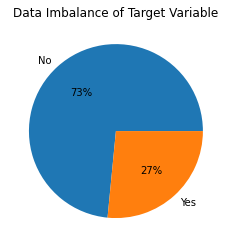

In [21]:
# data imbalance of target variable

from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.pie(churnData['Churn'].value_counts(), autopct='%.0f%%',labels=['No','Yes'])
plt.title('Data Imbalance of Target Variable')
plt.show()

## **Downsampling**

In [22]:
category_0 = churnData[churnData['Churn'] == "No"]
category_1 = churnData[churnData['Churn'] == "Yes"]

In [24]:
category_0 = category_0.sample(len(category_1))
print(category_0.shape)
print(category_1.shape)

(1869, 16)
(1869, 16)


In [25]:
data = pd.concat([category_0, category_1], axis=0)
#shuffling the data
data = data.sample(frac=1)
data['Churn'].value_counts()

Yes    1869
No     1869
Name: Churn, dtype: int64

In [27]:
X = data[["tenure","SeniorCitizen", "MonthlyCharges", "TotalCharges"]]
y = data["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [29]:
model = LogisticRegression(random_state=42)

model.fit(X_train,y_train)

model.score(X_test, y_test)

0.7232620320855615

<AxesSubplot:>

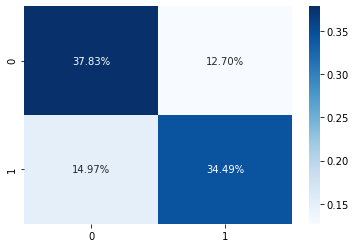

In [30]:
predictions = model.predict(X_test)

confusion_matrix(y_test, predictions)

cf_matrix = confusion_matrix(y_test, predictions, normalize='all')


sns.heatmap(cf_matrix, annot=True, fmt='.2%', cmap='Blues')

### The model's overall acurracy has decreased but it has improved in learning how to better predict the true 'No'

## **Upsampling**

In [32]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [35]:
y = churnData['Churn']
X = churnData[["tenure","SeniorCitizen", "MonthlyCharges", "TotalCharges"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_sm, y_sm = smote.fit_resample(X_train, y_train)
y_sm.value_counts()

Yes    4138
No     4138
Name: Churn, dtype: int64

In [36]:
X_train = sc.fit_transform(X_sm)
X_test = sc.transform (X_test)

In [38]:
model.fit(X_train,y_sm)

model.score(X_test, y_test)

0.7437899219304471

<AxesSubplot:>

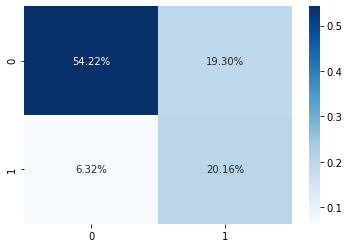

In [39]:
predictions = model.predict(X_test)

confusion_matrix(y_test, predictions)

cf_matrix = confusion_matrix(y_test, predictions, normalize='all')


sns.heatmap(cf_matrix, annot=True, fmt='.2%', cmap='Blues')

### The smote sampling method returns a similar overall accuracy score to the downsampling but does worse on the true 'No'.